<a href="https://colab.research.google.com/github/Ayushx29/Voyage-Analytics-Integrating-MLOps-in-Travel-Productionization-of-ML-Systems/blob/main/Gender_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Voyage Analytics: Integrating MLOps in Travel Productionization of ML Systems



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name**           - Ayush Dattatray Bhagat




# **Project Summary -**

In the realm of travel and tourism, the intersection of data analytics and machine learning presents an opportunity to revolutionize the way travel experiences are curated and delivered. This capstone project revolves around a trio of datasets - users, flights, and hotels - each providing a unique perspective on travel patterns and preferences. The goal is to leverage these datasets to build and deploy sophisticated machine learning models, serving a dual purpose: enhancing predictive capabilities in travel-related decision-making and mastering the art of MLOps through hands-on application.


# **GitHub Link -**

https://github.com/Ayushx29/Voyage-Analytics-Integrating-MLOps-in-Travel-Productionization-of-ML-Systems/tree/c1852b116b126d629590e3affb8a55ad59c480ae

# **Problem Statement**


This capstone project explores the intersection of data analytics and machine learning in the travel and tourism industry by leveraging datasets on users, flights, and hotels. The goal is to develop predictive models for flight price forecasting, hotel recommendations, and gender classification to enhance travel personalization and decision-making. Additionally, the project incorporates MLOps techniques such as model deployment, automation, and scalability using Flask, Docker, Kubernetes, Jenkins, Apache Airflow, and MLFlow, ensuring a seamless and efficient machine learning pipeline.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
flights_df = pd.read_csv("/content/drive/MyDrive/AlmaBetter Masters Projects/Voyage Analytics/travel_capstone/flights.csv",on_bad_lines='skip')
hotels_df = pd.read_csv("/content/drive/MyDrive/AlmaBetter Masters Projects/Voyage Analytics/travel_capstone/hotels.csv",on_bad_lines='skip')
users_df = pd.read_csv("/content/drive/MyDrive/AlmaBetter Masters Projects/Voyage Analytics/travel_capstone/users.csv",on_bad_lines='skip')

### Dataset First View

In [4]:
# Dataset First Look
flights_df.head(10)

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019
5,2,0,Salvador (BH),Aracaju (SE),firstClass,1531.92,2.16,830.86,CloudFy,10/12/2019
6,3,0,Aracaju (SE),Campo Grande (MS),economic,743.54,1.69,650.10,Rainbow,10/17/2019
7,3,0,Campo Grande (MS),Aracaju (SE),economic,877.56,1.69,650.10,Rainbow,10/20/2019
8,4,0,Recife (PE),Florianopolis (SC),economic,803.39,1.76,676.53,Rainbow,10/24/2019
9,4,0,Florianopolis (SC),Recife (PE),economic,695.30,1.76,676.53,Rainbow,10/26/2019


In [5]:
hotels_df.head(10)

,travelCode,userCode,name,place,days,price,total,date
0,0,0,Hotel A,Florianopolis (SC),4,313.02,1252.08,09/26/2019
1,2,0,Hotel K,Salvador (BH),2,263.41,526.82,10/10/2019
2,7,0,Hotel K,Salvador (BH),3,263.41,790.23,11/14/2019
3,11,0,Hotel K,Salvador (BH),4,263.41,1053.64,12/12/2019
4,13,0,Hotel A,Florianopolis (SC),1,313.02,313.02,12/26/2019
5,15,0,Hotel BD,Natal (RN),2,242.88,485.76,01/09/2020
6,22,0,Hotel Z,Aracaju (SE),2,208.04,416.08,02/27/2020
7,29,0,Hotel AU,Recife (PE),4,312.83,1251.32,04/16/2020
8,32,0,Hotel AF,Sao Paulo (SP),2,139.10,278.20,05/07/2020
9,33,0,Hotel K,Salvador (BH),4,263.41,1053.64,05/14/2020


In [6]:
users_df.head(10)

,code,company,name,gender,age
0,0,4You,Roy Braun,male,21
1,1,4You,Joseph Holsten,male,37
2,2,4You,Wilma Mcinnis,female,48
3,3,4You,Paula Daniel,female,23
4,4,4You,Patricia Carson,female,44
5,5,4You,Trina Thomas,none,47
6,6,4You,Jesse Decelle,male,46
7,7,4You,Gregoria Gil,female,21
8,8,4You,Jack Sabo,none,41
9,9,4You,Debbie Helms,none,35


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
flights_df.shape

(271888, 10)

In [8]:
hotels_df.shape

(40552, 8)

In [9]:
users_df.shape

(1340, 5)

### Dataset Information

In [11]:
# Dataset Info
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271888 entries, 0 to 271887
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   travelCode  271888 non-null  int64  
 1   userCode    271888 non-null  int64  
 2   from        271888 non-null  object 
 3   to          271888 non-null  object 
 4   flightType  271888 non-null  object 
 5   price       271888 non-null  float64
 6   time        271888 non-null  float64
 7   distance    271888 non-null  float64
 8   agency      271888 non-null  object 
 9   date        271888 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 20.7+ MB


In [12]:
hotels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40552 entries, 0 to 40551
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   travelCode  40552 non-null  int64  
 1   userCode    40552 non-null  int64  
 2   name        40552 non-null  object 
 3   place       40552 non-null  object 
 4   days        40552 non-null  int64  
 5   price       40552 non-null  float64
 6   total       40552 non-null  float64
 7   date        40552 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 2.5+ MB


In [13]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   code     1340 non-null   int64 
 1   company  1340 non-null   object
 2   name     1340 non-null   object
 3   gender   1340 non-null   object
 4   age      1340 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 52.5+ KB


#### Duplicate Values

In [14]:
# Dataset Duplicate Value Count
users_df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [16]:
# Missing Values/Null Values Count
users_df.isnull().sum()

,0
code,0
company,0
name,0
gender,0
age,0


### What did you know about your dataset?

The dataset contains 1340 rows and 5 columns : code, company, name, gender, and age. The code column represents a unique identifier, while company indicates the organization associated with each user. The name column stores users full names, and gender specifies whether the user is male or female. Lastly, the age column provides the age of each user. The dataset appears to be well-structured, with no missing values in any column

## ***2. Understanding Your Variables***

In [20]:
# Dataset Columns
users_df.columns

Index(['code', 'company', 'name', 'gender', 'age'], dtype='object')

In [21]:
# Dataset Describe
users_df.describe()

,code,age
count,1340.000000,1340.000000
mean,669.500000,42.742537
std,386.968991,12.869779
min,0.000000,21.000000
25%,334.750000,32.000000
50%,669.500000,42.000000
75%,1004.250000,54.000000
max,1339.000000,65.000000


### Variables Description

The code column represents a unique identifier, while company indicates the organization associated with each user. The name column stores users full names, and gender specifies whether the user is male or female. Lastly, the age column provides the age of each user.

### Check Unique Values for each variable.

In [22]:
# Check Unique Values for each variable.
users_df.nunique()

,0
code,1340
company,5
name,1338
gender,3
age,45


In [23]:
users_df['company'].value_counts()

,count
company,
4You,453
Acme Factory,261
Wonka Company,237
Monsters CYA,195
Umbrella LTDA,194


In [24]:
users_df[users_df['name']=='Charlotte Johnson']

,code,company,name,gender,age
316,316,4You,Charlotte Johnson,female,64
496,496,Monsters CYA,Charlotte Johnson,none,51


In [26]:
users_df.describe(include = 'object')

,company,name,gender
count,1340,1340,1340
unique,5,1338,3
top,4You,Charlotte Johnson,male
freq,453,2,452


In [27]:
users_df['gender'].value_counts()

,count
gender,
male,452
female,448
none,440


In [28]:
users_df1=users_df[(users_df['gender']=='male') | (users_df['gender']=='female') ]

In [29]:
label_encoder = LabelEncoder()

users_df1['company_encoded'] = label_encoder.fit_transform(users_df1['company'])
users_df1['gender_encoded'] = label_encoder.fit_transform(users_df1['gender'])

In [30]:
users_df1.head(10)

,code,company,name,gender,age,company_encoded,gender_encoded
0,0,4You,Roy Braun,male,21,0,1
1,1,4You,Joseph Holsten,male,37,0,1
2,2,4You,Wilma Mcinnis,female,48,0,0
3,3,4You,Paula Daniel,female,23,0,0
4,4,4You,Patricia Carson,female,44,0,0
6,6,4You,Jesse Decelle,male,46,0,1
7,7,4You,Gregoria Gil,female,21,0,0
10,10,4You,Melvin Lovejoy,male,36,0,1
11,11,4You,Virginia Roberts,female,61,0,0
12,12,4You,David Thomas,male,53,0,1


In [31]:
from sentence_transformers import SentenceTransformer

In [32]:
model = SentenceTransformer('flax-sentence-embeddings/all_datasets_v4_MiniLM-L6')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/535 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [33]:
text_columns = ['name']

for column in text_columns:
    users_df1[column + '_embedding'] = users_df1[column].apply(lambda text: model.encode(text))

# Concatenate the embeddings into a single feature vector
text_embeddings = users_df1[text_columns].values.tolist()

In [34]:
n_components = 23
pca = PCA(n_components=n_components)
text_columns = ['name']

text_embeddings_pca = np.empty((len(users_df1), n_components * len(text_columns)))

for i, column in enumerate(text_columns):
    embeddings = users_df1[column + '_embedding'].values.tolist()
    embeddings_pca = pca.fit_transform(embeddings)
    text_embeddings_pca[:, i * n_components:(i + 1) * n_components] = embeddings_pca

numerical_features=['code','company_encoded','age']


X_numerical = users_df1[numerical_features].values

# Combine PCA-transformed text embeddings and numerical features
X = np.hstack((text_embeddings_pca, X_numerical))
# Target variable
y = users_df1['gender_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
print(len(text_embeddings))
print("Shape of X:", X.shape)

900
Shape of X: (900, 26)


In [39]:
users_df1[numerical_features].values

array([[   0,    0,   21],
       [   1,    0,   37],
       [   2,    0,   48],
       ...,
       [1337,    3,   28],
       [1338,    3,   52],
       [1339,    3,   35]])

## ***7. ML Model Implementation***

### Logistic Regression


In [40]:
# ML Model - 1 Implementation
lr_classifier = LogisticRegression(random_state=42)
# Fit the Algorithm
lr_classifier.fit(X_train, y_train)
# Predict on the model
y_pred_lr = lr_classifier.predict(X_test)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Accuracy: 0.9555555555555556

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.92      0.95        77
           1       0.94      0.98      0.96       103

    accuracy                           0.96       180
   macro avg       0.96      0.95      0.95       180
weighted avg       0.96      0.96      0.96       180



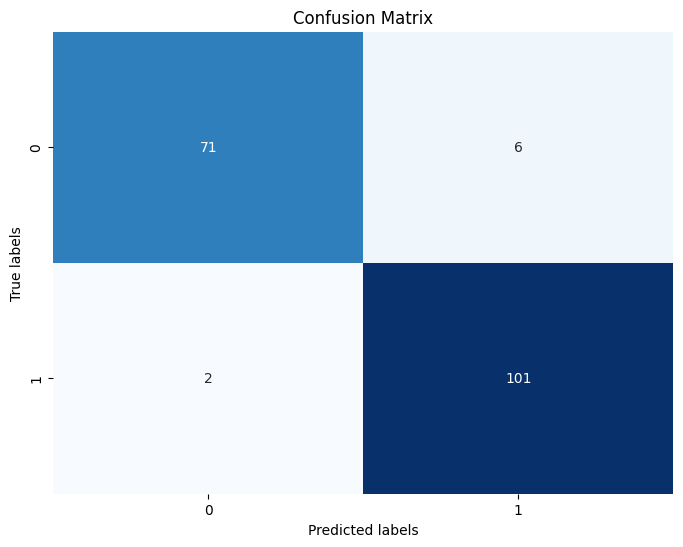

In [41]:
# Visualizing evaluation Metric Score chart
accuracy = lr_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred_lr)
print("\nClassification Report:\n", report)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on the training set
lr_classifier.fit(X_train, y_train)

# Predictions on training and validation sets
y_train_pred = lr_classifier.predict(X_train)
y_val_pred = lr_classifier.predict(X_val)

# Calculate accuracy on training and validation sets
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# Check if overfitting
if train_accuracy > val_accuracy:
    print("The model is overfitting.")
else:
    print("The model is not overfitting.")

Training Accuracy: 0.9708333333333333
Validation Accuracy: 0.9666666666666667
The model is overfitting.


In [43]:
model_result = pd.DataFrame([['Logistic Regression Baseline', train_accuracy,val_accuracy]],
               columns = ['Model', 'Train accuracy', 'Validation accuracy'])

model_result

,Model,Train accuracy,Validation accuracy
0,Logistic Regression Baseline,0.970833,0.966667


### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***